# Parking management system

# Parking Management App

A basic simple parking management 
![](https://drive.google.com/uc?export=view&id=1VhNTXTTHmqChR_-F-IgVEPpW9KEmVCr2)
consists of the following idea
- whether a slot is having a car or not
  - Yellow color slots
- whether is car is parked outside the slots
  - Car marked in red
- car parked between two slots
   - Car marked in blue

**The procedure is**
- Take a snapshot
  - ![](./frame.jpg)
- Mark all the parking slots
  - ![](./frame_annotated.jpg)
- Detect cars in the image
  - ![](https://drive.google.com/uc?export=view&id=1iE76OiNtV83f3vUcmUCxoJ4Vp9mll5CF)
- Overlay car boxes over parking slot boxes
  - ![](https://drive.google.com/uc?export=view&id=1GTozLBNwIAD1z233pMGbcCP0JSbOmALO)
- Algorithms
  - Algo 1: Check if car's center (the box covering car's center) is inside parking slot
    - ![](https://drive.google.com/uc?export=view&id=1ZSt60xl1ON9S1GVOBhw5AvpmGrpYiiPF)
  - Algo 2: Check if car's center and two other points(the front right and front left of car's bounding box) is inside parking slot

### Step 1: See the sample Video

In [1]:
from ipywidgets import Video

Video.from_file("./c10_5.mp4", width=640)

Video(value=b'\x00\x00\x00\x18ftypmp42\x00\x00\x00\x00isommp42\x00\x00G\x8emoov\x00\x00\x00lmvhd...', width='6…

### Step 2: Take a snapshot 

In [2]:
import numpy as np
import cv2
cap = cv2.VideoCapture('./c10_5.mp4')
while(cap.isOpened()):
    ret, frame = cap.read()
    cv2.imwrite("frame.jpg", frame)
    break;


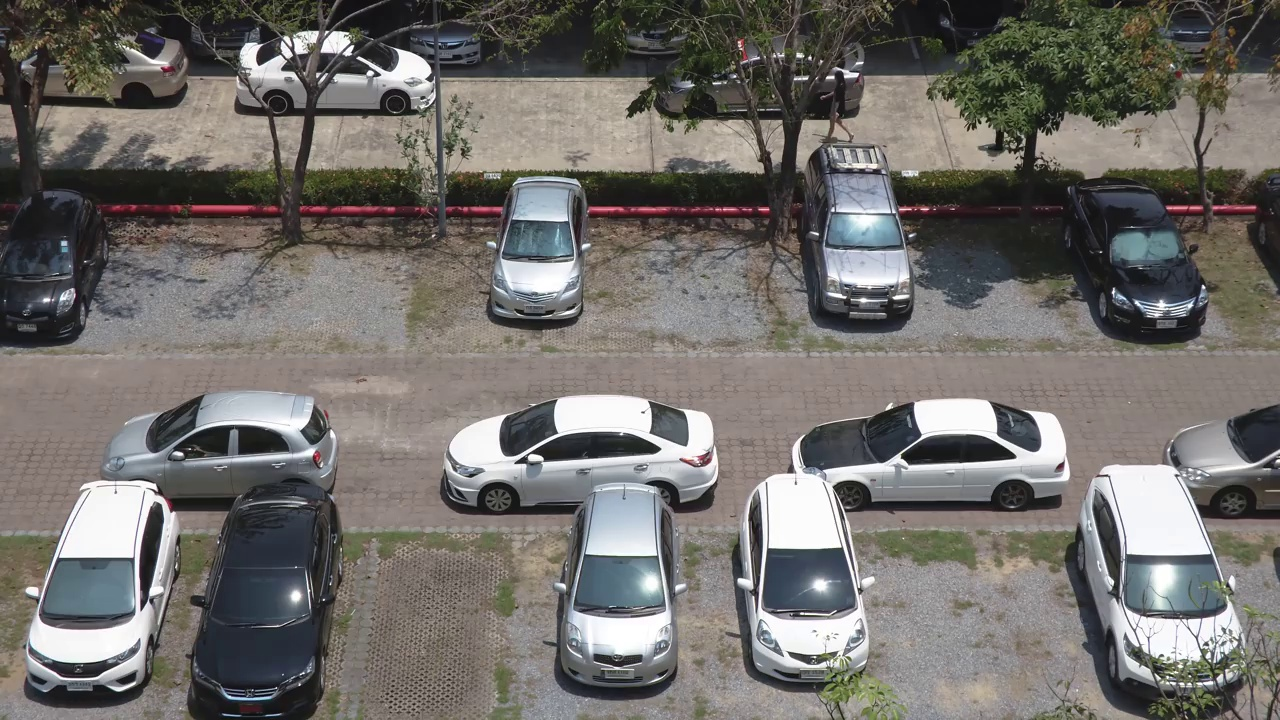

In [3]:
from IPython.display import Image
Image(filename='frame.jpg') 

### Step 3: Marking the parking slots

The process of marking regions on an image to give it an identity is called as **Annotation**. This is done to tell the AI engine what to learn. For now you will use [VGG VIA tool](https://www.robots.ox.ac.uk/~vgg/software/via/via_demo.html) just to mark the parking slots. 

We will take up annotation in details. 





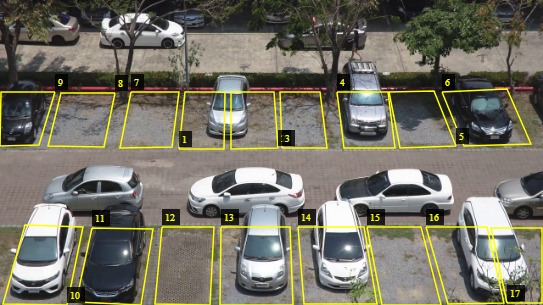

In [4]:
from IPython.display import Image
Image(filename='frame_annotated.jpg') 

In [5]:
# Total of 17 parking slots

## Reading the annotation and get details

For now, all you need to know is, the polygon that we drafted around every parking slot has 2 points (x and y) for every vertex of the polygon.

The annotation selected by us here is in COCO Json format. We will check coco details in next chapter. 

For now, have a look at 
```
data["annotations"]
```
This is how you can get annotations and the annotation of every parking slot will look like this

```
{'area': 37736,
  'bbox': [2, 533, 212, 178],
  'category_id': 1,
  'id': 1,
  'image_id': 1,
  'iscrowd': 0,
  'segmentation': [[167, 711, 214, 536, 62, 533, 2, 709]]}
```

![](https://drive.google.com/uc?export=view&id=18dVIqsnwNdqNtDO_fvsWBU-AX9tv62Gw)

- The yellow polygon is represented by "segmentation" 
  - x1 y1, x2 y2, x3 y3, x4, y4, ...... in cyclical fashion
- The green rectangle is represented by "bbox" 
  - x1 y1 -> top left corner of bounding box 
  - x2 y2 -> bottom right corner of bounding box




In [6]:
# Reading Coco format

import json

f = open('frame_annotation_coco.json')
data = json.load(f)

In [7]:
data.keys()

dict_keys(['info', 'images', 'annotations', 'licenses', 'categories'])

In [8]:
data["info"]

{'year': 2024,
 'version': '1.0',
 'description': 'VIA project exported to COCO format using VGG Image Annotator (http://www.robots.ox.ac.uk/~vgg/software/via/)',
 'contributor': '',
 'url': 'http://www.robots.ox.ac.uk/~vgg/software/via/',
 'date_created': 'Wed Nov 13 2024 17:08:02 GMT+0530 (India Standard Time)'}

In [9]:
data["images"]

[{'id': 1,
  'width': 600,
  'height': 394,
  'file_name': 'frame.jpg',
  'license': 0,
  'flickr_url': 'frame.jpg',
  'coco_url': 'frame.jpg',
  'date_captured': ''}]

In [10]:
data["annotations"]

[{'segmentation': [[421, 351, 435, 217, 530, 217, 527, 351]],
  'area': 14606,
  'bbox': [421, 217, 109, 134],
  'iscrowd': 0,
  'id': 1,
  'image_id': 1,
  'category_id': 8},
 {'segmentation': [[656, 349, 544, 351, 545, 216, 645, 216]],
  'area': 15120,
  'bbox': [544, 216, 112, 135],
  'iscrowd': 0,
  'id': 2,
  'image_id': 1,
  'category_id': 8},
 {'segmentation': [[665, 349, 660, 216, 755, 216, 770, 349]],
  'area': 14630,
  'bbox': [660, 216, 110, 133],
  'iscrowd': 0,
  'id': 3,
  'image_id': 1,
  'category_id': 8},
 {'segmentation': [[794, 216, 812, 350, 932, 349, 914, 216]],
  'area': 18492,
  'bbox': [794, 216, 138, 134],
  'iscrowd': 0,
  'id': 4,
  'image_id': 1,
  'category_id': 8},
 {'segmentation': [[1074, 343, 1024, 214, 918, 216, 942, 348]],
  'area': 20904,
  'bbox': [918, 214, 156, 134],
  'iscrowd': 0,
  'id': 5,
  'image_id': 1,
  'category_id': 8},
 {'segmentation': [[1043, 216, 1093, 344, 1252, 339, 1195, 210]],
  'area': 28006,
  'bbox': [1043, 210, 209, 134],
  

In [11]:
# Bounding box and Segmentation annotation printing

In [12]:
import cv2

img = cv2.imread("frame.jpg");

for i in range(len(data["annotations"])):
    seg = data["annotations"][i]["segmentation"];
    pts = [];
    for j in range(len(seg[0])//2):
        pts.append([seg[0][j*2], seg[0][j*2+1]]);
    pts = np.array(pts);
    pts = pts.reshape((-1, 1, 2))
    isClosed = True
    img = cv2.polylines(img, [pts], 
                      isClosed, (0, 255, 255), 3)
    
    bbox = data["annotations"][i]["bbox"]
    x1 = bbox[0];
    y1 = bbox[1];
    x2 = bbox[0]+bbox[2];
    y2 = bbox[1]+bbox[3];
    img = cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 3);
    break;
    

cv2.imwrite("frame_annotated_rec.jpg", img);

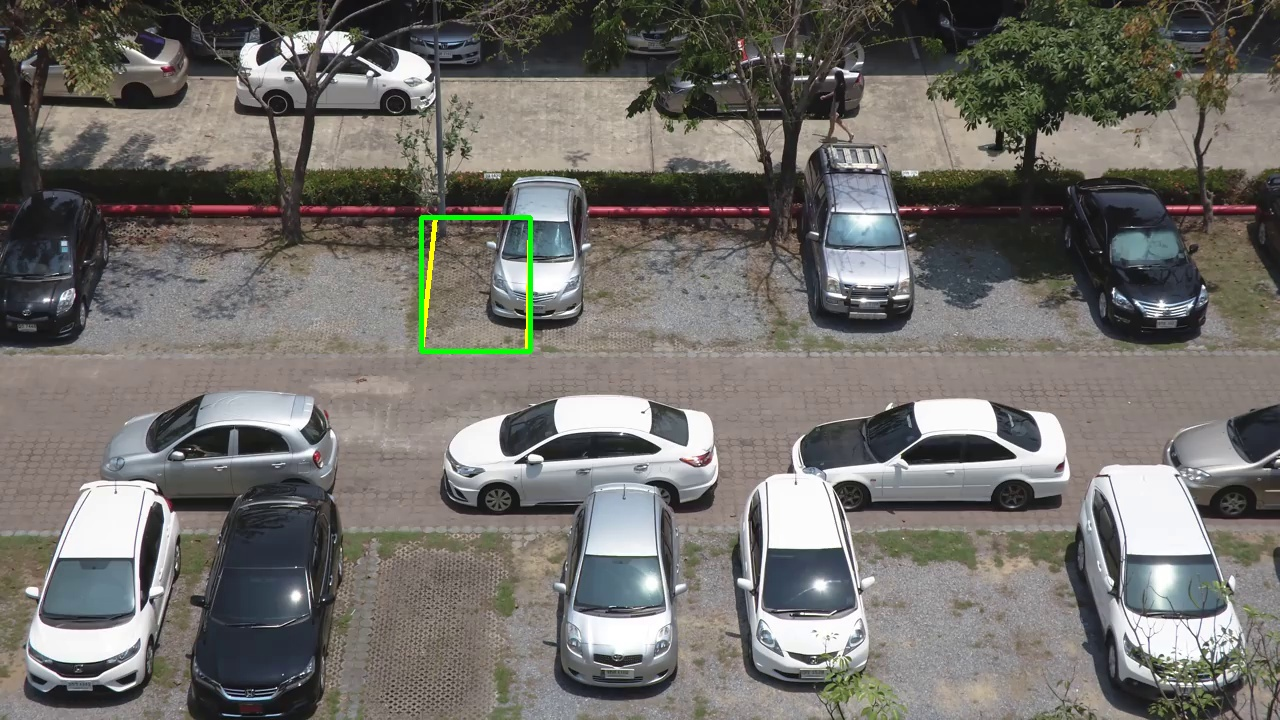

In [13]:
from IPython.display import Image
Image(filename='frame_annotated_rec.jpg') 

In [14]:
import cv2

img = cv2.imread("frame.jpg");

for i in range(len(data["annotations"])):
    seg = data["annotations"][i]["segmentation"];
    pts = [];
    for j in range(len(seg[0])//2):
        pts.append([seg[0][j*2], seg[0][j*2+1]]);
    pts = np.array(pts);
    pts = pts.reshape((-1, 1, 2))
    isClosed = True
    img = cv2.polylines(img, [pts], 
                      isClosed, (0, 255, 255), 3)
    
    bbox = data["annotations"][i]["bbox"]
    x1 = bbox[0];
    y1 = bbox[1];
    x2 = bbox[0]+bbox[2];
    y2 = bbox[1]+bbox[3];
    img = cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 3);
    break;
    

cv2.imwrite("frame_annotated_rec.jpg", img);

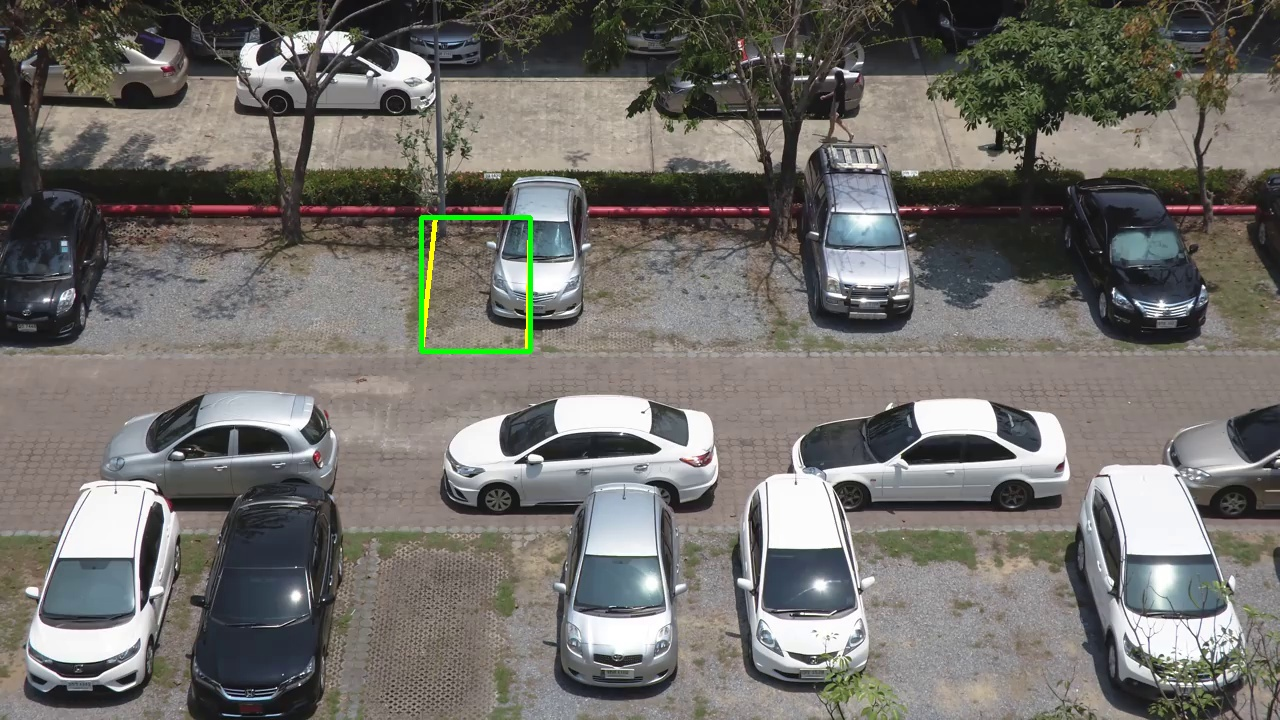

In [15]:
from IPython.display import Image
Image(filename='frame_annotated_rec.jpg') 

In [16]:
data["categories"]

[{'supercategory': 'type', 'id': 1, 'name': 'Bird'},
 {'supercategory': 'type', 'id': 2, 'name': 'Human'},
 {'supercategory': 'type', 'id': 3, 'name': 'Cup (object)'},
 {'supercategory': 'type', 'id': 4, 'name': 'Unknown (object)'},
 {'supercategory': 'type', 'id': 5, 'name': 'Bird'},
 {'supercategory': 'type', 'id': 6, 'name': 'Human'},
 {'supercategory': 'type', 'id': 7, 'name': 'Cup (object)'},
 {'supercategory': 'type', 'id': 8, 'name': 'Unknown (object)'}]

## MMdetection installation

In [17]:
import torch

torch.__version__

'2.4.1+cpu'

In [27]:
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cpu/torch2.3.0/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cpu/torch2.3.0/index.html
  Using cached mmcv-full-1.7.2.tar.gz (607 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached addict-2.4.0-py3-none-any.whl.metadata (1.0 kB)
  Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl.metadata (41 kB)
  Using cached yapf-0.40.2-py3-none-any.whl.metadata (45 kB)
  Using cached importlib_metadata-8.5.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached tomli-2.1.0-py3-none-any.whl.metadata (10.0 kB)
  Using cached zipp-3.21.0-py3-none-any.whl.metadata (3.7 kB)
Using cached addict-2.4.0-py3-none-any.whl (3.8 kB)
Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl (273 kB)
Using cached yapf-0.40.2-py3-none-any.whl (254 kB)
Using cached importlib_metadata-8.5.0-py3-none-any.whl (26 kB)
Using cached tomli-2.1.0-py3-none-any.whl (13 kB)
Using cached zipp-3.21.0-py3-none-any.whl (9.6 kB)
  Running setup.py clean for mmcv-ful

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [1566 lines of output]
  C:\Users\Abhay Maheshwari\AppData\Local\Temp\pip-install-68ajswdj\mmcv-full_ebc405c5980e4532ae5877a86ad67ebb\setup.py:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
    from pkg_resources import DistributionNotFound, get_distribution, parse_version
  Compiling mmcv._ext only with CPU
  running bdist_wheel
  C:\Users\Abhay Maheshwari\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\cpp_extension.py:495: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
    warnings.warn(msg.format('we could not find ninja.'))
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-312
  creating build\lib.win-amd64-cpython-312\mmcv
  copying

In [22]:
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .

A:\AI\Projects\mmdetection


fatal: destination path 'mmdetection' already exists and is not an empty directory.


Obtaining file:///A:/AI/Projects/mmdetection
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: mmdet
    Found existing installation: mmdet 3.3.0
    Uninstalling mmdet-3.3.0:
      Successfully uninstalled mmdet-3.3.0
  Running setup.py develop for mmdet


  DEPRECATION: Legacy editable install of mmdet==3.3.0 from file:///A:/AI/Projects/mmdetection (setup.py develop) is deprecated. pip 25.0 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457


## Model Loading 

In [35]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv

ModuleNotFoundError: No module named 'mmcv'

In [ ]:
! wget https://download.openmmlab.com/mmdetection/v2.0/retinanet/retinanet_x101_64x4d_fpn_1x_coco/retinanet_x101_64x4d_fpn_1x_coco_20200130-366f5af1.pth

In [ ]:
config_file = 'configs/retinanet/retinanet_x101_64x4d_fpn_1x_coco.py'
checkpoint_file = 'retinanet_x101_64x4d_fpn_1x_coco_20200130-366f5af1.pth'

In [ ]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0') #device="cuda:0"

## Step 4: Detect the cars 

In [ ]:
# test a single image
img = "../frame.jpg"
result = inference_detector(model, img)

In [ ]:
# show the results
show_result_pyplot(model, img, result)

## Step 5:Parking slot management logic

#### Substep 1: Display parking bbox

In [ ]:
import cv2

img = cv2.imread("../frame.jpg");

for i in range(len(data["annotations"])):
    bbox = data["annotations"][i]["bbox"]
    x1 = bbox[0];
    y1 = bbox[1];
    x2 = bbox[0]+bbox[2];
    y2 = bbox[1]+bbox[3];
    img = cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 3);   

cv2.imwrite("../frame_annotated_bbox.jpg", img);

In [ ]:
from IPython.display import Image
Image(filename='../frame_annotated_bbox.jpg') 

### Substep 2: Display both parking slot and vehicles detected

In [ ]:
img = "../frame_annotated_bbox.jpg"
result = inference_detector(model, img)

In [ ]:
show_result_pyplot(model, img, result)

In [ ]:
model.CLASSES

In [ ]:
# car is index 2

In [ ]:
# Show only the cars and having confidence more than 0.35

img = cv2.imread("../frame_annotated_bbox.jpg");

for j in range(len(result[2])):
    x1 = int(result[2][j][0]);
    y1 = int(result[2][j][1]);
    x2 = int(result[2][j][2]);
    y2 = int(result[2][j][3]);
    score = result[2][j][4];

    if(score < 0.35):
        break;

    img = cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,255), 3);
cv2.imwrite("../frame_result.jpg", img);

In [ ]:
from IPython.display import Image
Image(filename='../frame_result.jpg') 

In [ ]:
# Logic: If car's 
#          - center
#         is  inside the parking slot then that slot is full


# Full slot - yellow rectangle
# Empty slot - Green rectangle
# Car not in any parking - red rectangle
# Car in a parking space - No rectangle

### Substep 3: A basic Logic

Car's center is decided by the box that is representing it's detection. So the first logic is if the car's center falls inside any one of the parking slot (represented by the box and not the polygon) then
  - that parking slot is occupied and other are full
  - and the car is in right place
Second logic, if the car's center is not in any parking slot then
  - the car is parked wrongly

![](https://drive.google.com/uc?export=view&id=1Kz9ighqngm2GjhOpfWCXknVI3w045cRO)


In [ ]:
img = cv2.imread("../frame.jpg");

def check_if_inside(x1, y1, x2, y2, pt):
   if (pt[0] > x1 and pt[0] < x2 and pt[1] > y1 and pt[1] < y2) :
      return True
   else :
      return False

# Creating 17 slots and making them free initially
slots = [1]*17;


for i in range(len(result[2])):
    x1 = int(result[2][i][0]);
    y1 = int(result[2][i][1]);
    x2 = int(result[2][i][2]);
    y2 = int(result[2][i][3]);
    score = result[2][i][4];

    if(score < 0.39):
        break;

    # center
    c = [(x1+x2)//2, (y1+y2)//2];
    cv2.circle(img,(c[0], c[1]), 5, (255,255,0), -1)

    car_in_parking_slot = False;
    for j in range(len(data["annotations"])):
        bbox = data["annotations"][j]["bbox"]
        bx1 = bbox[0];
        by1 = bbox[1];
        bx2 = bbox[0]+bbox[2];
        by2 = bbox[1]+bbox[3];

        if(check_if_inside(bx1, by1, bx2, by2, c)):
            slots[j] = 0;
            car_in_parking_slot = True;

    if not car_in_parking_slot: 
        img = cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 3);



# Based on which slots are free now mark them yellow and green
for j in range(len(data["annotations"])):
    bbox = data["annotations"][j]["bbox"]
    bx1 = bbox[0];
    by1 = bbox[1];
    bx2 = bbox[0]+bbox[2];
    by2 = bbox[1]+bbox[3];

    if not slots[j]:
        img = cv2.rectangle(img, (bx1, by1), (bx2, by2), (0,255,255), 3);
    else:
        img = cv2.rectangle(img, (bx1, by1), (bx2, by2), (0,255,0), 3);       

    
cv2.imwrite("../frame_result.jpg", img);

In [ ]:
from IPython.display import Image
Image(filename='../frame_result.jpg') 

In [ ]:
# Interactive tutorial

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import math
from PIL import Image, ImageEnhance
import numpy as np
from matplotlib import pyplot as plt



sl1 = widgets.IntSlider(value=0, min=0, max=len(result[2])*len(data["annotations"]), step=1);

def check_if_inside(x1, y1, x2, y2, pt):
   if (pt[0] > x1 and pt[0] < x2 and pt[1] > y1 and pt[1] < y2) :
      return True
   else :
      return False

def f1(step):

    img = cv2.imread("../frame.jpg");

    i = int(step//len(data["annotations"]));
    j = int(step%len(data["annotations"]));


    x1 = int(result[2][i][0]);
    y1 = int(result[2][i][1]);
    x2 = int(result[2][i][2]);
    y2 = int(result[2][i][3]);
    score = result[2][i][4];

    # center
    c = [(x1+x2)//2, (y1+y2)//2];
    cv2.circle(img,(c[0], c[1]), 5, (255,255,0), -1)

    in_parking_slot = False;
    
    bbox = data["annotations"][j]["bbox"]
    bx1 = bbox[0];
    by1 = bbox[1];
    bx2 = bbox[0]+bbox[2];
    by2 = bbox[1]+bbox[3];

    if(check_if_inside(bx1, by1, bx2, by2, c)):
        img = cv2.rectangle(img, (bx1, by1), (bx2, by2), (0,255,255), 3);
        in_parking_slot = True;
    else:
        img = cv2.rectangle(img, (bx1, by1), (bx2, by2), (0,255,0), 3);



    if not in_parking_slot: 
        img = cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 3);


    f = plt.figure(figsize=(15,15))
    f.add_subplot(1, 1, 1).set_title('Matching image');
    plt.imshow(img[:,:,::-1]);
    plt.show()

interact(f1, step=sl1);

# 190 to 203
# 102 to 110

In [ ]:
# Advancing the logic with polygon check

### Substep 4: Advanced logic - Representing parking slot as a polygon

Why do you need that?

See the image, 

![](https://drive.google.com/uc?export=view&id=18dVIqsnwNdqNtDO_fvsWBU-AX9tv62Gw)

the green box covers more area as compared to rhe yellow polygon, and the yellow polygon represents smaller space. And the yellow space is the one that actually represents the parking space.

So the center being inside the yellow region is better than the center being inside the green box.

In [ ]:
! pip install shapely

In [ ]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [ ]:
img = cv2.imread("../frame.jpg");

def check_if_inside(polygon, pt):
    polygon = Polygon(polygon)
    point = Point(pt)
    return polygon.contains(point)

# Creating 17 slots and making them free initially
slots = [1]*17;


for i in range(len(result[2])):
    x1 = int(result[2][i][0]);
    y1 = int(result[2][i][1]);
    x2 = int(result[2][i][2]);
    y2 = int(result[2][i][3]);
    score = result[2][i][4];

    if(score < 0.39):
        break;

    # center
    c = [(x1+x2)//2, (y1+y2)//2];
    cv2.circle(img,(c[0], c[1]), 5, (255,255,0), -1)

    car_in_parking_slot = False;
    for j in range(len(data["annotations"])):
        seg = data["annotations"][j]["segmentation"];
        polygon = [];
        for k in range(len(seg[0])//2):
            polygon.append([seg[0][k*2], seg[0][k*2+1]]);

        if(check_if_inside(polygon, c)):
            slots[j] = 0;
            car_in_parking_slot = True;

    if not car_in_parking_slot: 
        img = cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 3);



# Based on which slots are free now mark them yellow and green
for i in range(len(data["annotations"])):
    seg = data["annotations"][i]["segmentation"];
    pts = [];
    for j in range(len(seg[0])//2):
        pts.append([seg[0][j*2], seg[0][j*2+1]]);
    pts = np.array(pts);
    pts = pts.reshape((-1, 1, 2))
    isClosed = True
    if not slots[i]:
        img = cv2.polylines(img, [pts], isClosed, (0, 255, 255), 3);
    else:
        img = cv2.polylines(img, [pts], isClosed, (0, 255, 0), 3);


cv2.imwrite("../frame_result.jpg", img);

In [ ]:
from IPython.display import Image
Image(filename='../frame_result.jpg') 

# Assignment - Advanced logic

Logic: If car's 
  - forward left
  - center
  - forward right 
are  inside the parking slot then that slot is llll


Full slot - yellow polygon

Empty slot - Green polygon

Car not in any parking - red rectangle

Car in a parking space - Blue rectangle

Additional Logic
- if all the three points are in same then parking is correct
    - car need not be marked
- if one of the points is any different slot or outside the slot then parking done is wrong 
    - mark this as blue

In [ ]:
# Solution

In [ ]:
img = cv2.imread("../frame.jpg");

def check_if_inside(polygon, pt):
    polygon = Polygon(polygon)
    point = Point(pt)
    return polygon.contains(point)

# Creating 17 slots and making them free initially
slots = [1]*17;


for i in range(len(result[2])):
    x1 = int(result[2][i][0]);
    y1 = int(result[2][i][1]);
    x2 = int(result[2][i][2]);
    y2 = int(result[2][i][3]);
    score = result[2][i][4];

    if(score < 0.39):
        break;

    # center
    c = [(x1+x2)//2, (y1+y2)//2];
    cv2.circle(img,(c[0], c[1]), 5, (255,255,0), -1)

    # front left
    fl = [x1+30, y2-30];
    cv2.circle(img,(fl[0], fl[1]), 5, (255,255,0), -1)

    # front right
    fr = [x2-30, y2-30];
    cv2.circle(img,(fr[0], fr[1]), 5, (255,255,0), -1)

    car_in_parking_slot = False;
    car_in_parking_slot_correct = False;
    for j in range(len(data["annotations"])):
        seg = data["annotations"][j]["segmentation"];
        polygon = [];
        for k in range(len(seg[0])//2):
            polygon.append([seg[0][k*2], seg[0][k*2+1]]);

        if(check_if_inside(polygon, c) or check_if_inside(polygon, fl) or check_if_inside(polygon, fr)):
            slots[j] = 0;
            car_in_parking_slot = True;
            if(check_if_inside(polygon, fl) and check_if_inside(polygon, fr)):
                car_in_parking_slot_correct = True;


    if not car_in_parking_slot: 
        img = cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 3);
    if car_in_parking_slot and not car_in_parking_slot_correct:
        img = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 3);



# Based on which slots are free now mark them yellow and green
for i in range(len(data["annotations"])):
    seg = data["annotations"][i]["segmentation"];
    pts = [];
    for j in range(len(seg[0])//2):
        pts.append([seg[0][j*2], seg[0][j*2+1]]);
    pts = np.array(pts);
    pts = pts.reshape((-1, 1, 2))
    isClosed = True
    if not slots[i]:
        img = cv2.polylines(img, [pts], isClosed, (0, 255, 255), 3);
    else:
        img = cv2.polylines(img, [pts], isClosed, (0, 255, 0), 3);


cv2.imwrite("../frame_result.jpg", img);

In [ ]:
from IPython.display import Image
Image(filename='../frame_result.jpg') 

# Parking management logic on Video

In [ ]:
import os
os.path.isfile("../data/c10_5.mp4")

In [ ]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

def check_if_inside(polygon, pt):
    polygon = Polygon(polygon)
    point = Point(pt)
    return polygon.contains(point)

In [ ]:
def parking_logic(img, result):
    # Creating 17 slots and making them free initially
    slots = [1]*17;

    for i in range(len(result[2])):
        x1 = int(result[2][i][0]);
        y1 = int(result[2][i][1]);
        x2 = int(result[2][i][2]);
        y2 = int(result[2][i][3]);
        score = result[2][i][4];

        if(score < 0.39):
            break;

        # center
        c = [(x1+x2)//2, (y1+y2)//2];
        cv2.circle(img,(c[0], c[1]), 5, (255,255,0), -1)

        # front left
        fl = [x1+30, y2-30];
        cv2.circle(img,(fl[0], fl[1]), 5, (255,255,0), -1)

        # front right
        fr = [x2-30, y2-30];
        cv2.circle(img,(fr[0], fr[1]), 5, (255,255,0), -1)

        car_in_parking_slot = False;
        car_in_parking_slot_correct = False;
        for j in range(len(data["annotations"])):
            seg = data["annotations"][j]["segmentation"];
            polygon = [];
            for k in range(len(seg[0])//2):
                polygon.append([seg[0][k*2], seg[0][k*2+1]]);

            if(check_if_inside(polygon, c) or check_if_inside(polygon, fl) or check_if_inside(polygon, fr)):
                slots[j] = 0;
                car_in_parking_slot = True;
                if(check_if_inside(polygon, fl) and check_if_inside(polygon, fr)):
                    car_in_parking_slot_correct = True;


        if not car_in_parking_slot: 
            img = cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 3);
        if car_in_parking_slot and not car_in_parking_slot_correct:
            img = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 3);



    # Based on which slots are free now mark them yellow and green
    for i in range(len(data["annotations"])):
        seg = data["annotations"][i]["segmentation"];
        pts = [];
        for j in range(len(seg[0])//2):
            pts.append([seg[0][j*2], seg[0][j*2+1]]);
        pts = np.array(pts);
        pts = pts.reshape((-1, 1, 2))
        isClosed = True
        if not slots[i]:
            img = cv2.polylines(img, [pts], isClosed, (0, 255, 255), 3);
        else:
            img = cv2.polylines(img, [pts], isClosed, (0, 255, 0), 3);

    return img


In [ ]:
import cv2

video_reader = mmcv.VideoReader("../data/c10_5.mp4")
video_writer = None
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(
    "../output.mp4", fourcc, video_reader.fps,
    (video_reader.width, video_reader.height))


for frame in mmcv.track_iter_progress(video_reader):
    result = inference_detector(model, frame)

    frame = parking_logic(frame, result);

    video_writer.write(frame)

video_writer.release()